## Importamos todos los paquetes aquí por comodidad

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression

In [10]:
import os
os.getcwd()

'c:\\Users\\pablo\\OneDrive\\Escritorio\\Archivo\\Safe place\\Universidad\\iMAT\\1º\\Asignaturas\\Probabilidad y estadística\\Prácticas\\Proyecto 1'

## Cargamos los datos con los que se trabaja

In [11]:
nom_fi_datos = 'G02B_DATOS_DEM_M4.csv'

In [12]:
df_orig = pd.read_csv(nom_fi_datos)

# parseamos la fecha (cadena) para que sea un datetime con formato dd/mm/yyyy 
df_orig.FECHA = pd.to_datetime(df_orig.FECHA, format='%d/%m/%Y') 
s=df_orig.loc[:,'FECHA']
df_orig['DATE'] =  s.dt.date
del df_orig['FECHA']

# añadimos el año-semana para luego poder trabajar cómodamente con el dataframe
ywd=s.dt.isocalendar()
yw = 1000*ywd['year'] + ywd['week'] # por ejemplo 2022032 es la semana 32 del año 2022
df_orig['ANNO-SEMANA'] = yw

print('Tamaño de df_orig con los datos cargados:', df_orig.shape)
print('Dataframe con todos los datos leidos (filas: días, columnas: variables):')
print(df_orig)

Tamaño de df_orig con los datos cargados: (1627, 33)
Dataframe con todos los datos leidos (filas: días, columnas: variables):
          CR00      CR01      CR02      CR03      CR04      CR05      CR06  \
0     0.039126  0.035324  0.032842  0.031533  0.030857  0.030710  0.030730   
1     0.039032  0.035356  0.032867  0.031417  0.030783  0.030597  0.030657   
2     0.039508  0.035976  0.033711  0.032332  0.031694  0.031551  0.031673   
3     0.040454  0.036701  0.034026  0.032566  0.031944  0.031670  0.031479   
4     0.042847  0.039526  0.036950  0.035158  0.034001  0.033421  0.032762   
...        ...       ...       ...       ...       ...       ...       ...   
1622  0.037500  0.034070  0.031581  0.030255  0.029750  0.030143  0.032196   
1623  0.038127  0.034337  0.031761  0.030471  0.029983  0.030307  0.032492   
1624  0.038088  0.034451  0.031834  0.030294  0.029645  0.029982  0.032268   
1625  0.037944  0.034254  0.031777  0.030190  0.029627  0.029865  0.032261   
1626  0.039021  

### 1. Visión general de las series

In [13]:
# auxiliares útiles para la representación
fechas = df_orig.DATE.tolist()

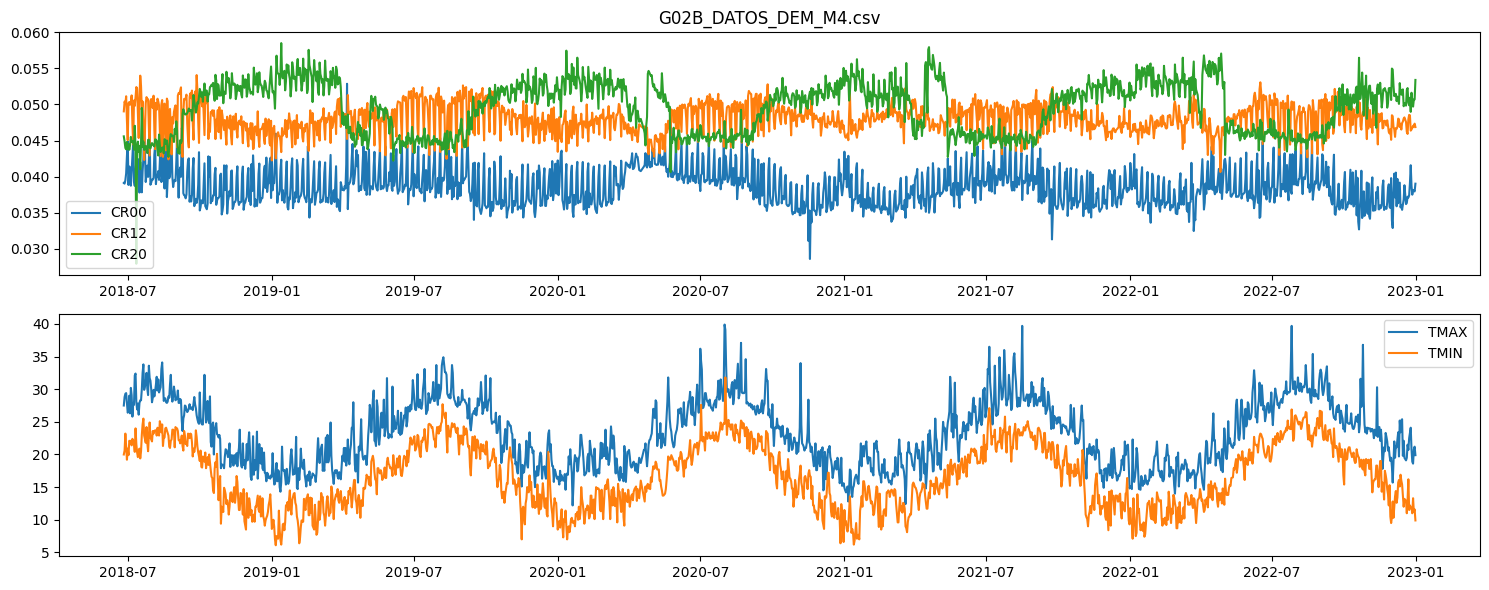

In [14]:
fig = plt.figure(1, figsize=(15,6)) # permite indicar el nº de la figura y las dimensiones (ancho y alto)
ax1 = plt.subplot(2,1,1)
plt.plot(fechas, df_orig.CR00, label='CR00')
plt.plot(fechas, df_orig.CR12, label='CR12')
plt.plot(fechas, df_orig.CR20, label='CR20')
plt.title(nom_fi_datos)
plt.legend()

plt.subplot(2,1,2,sharex= ax1)
plt.plot(fechas, df_orig.TMAX, label='TMAX')
plt.plot(fechas, df_orig.TMIN, label='TMIN')
plt.tight_layout()
plt.legend()

plt.show()

fig.savefig('figura1.pdf')

# PREGUNTAS DEL BULLET POINT 1

## Pregunta 1: ¿cómo es la distribución de los coeficientes en las horas 12, y 20?

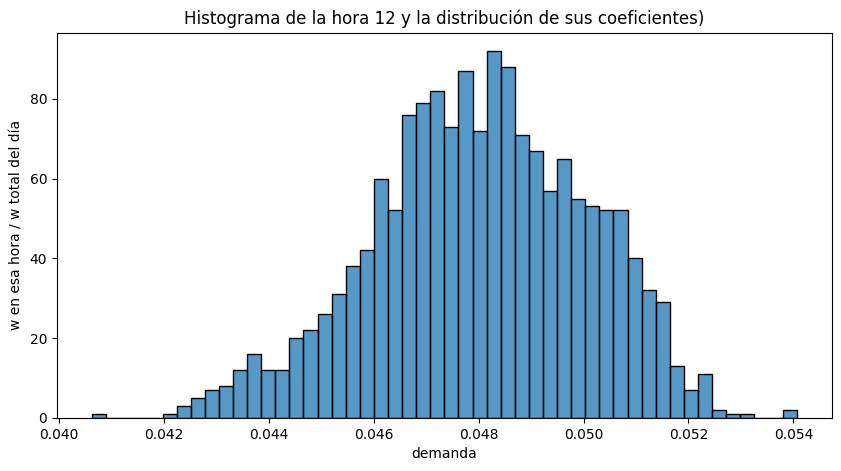

In [15]:
# Pregunta 1: ¿cómo es la distribución de los coeficientes en las horas 12, y 20?
nbins = 50 # número de intervalos, ajustar para buena visualización

fig = plt.figure(1, figsize=(10, 5)) # permite indicar el nº de la figura y las dimensiones (ancho y alto)
sns.histplot(data= df_orig['CR12'], bins=nbins)
# sns.rugplot(x, color='r')                            # opcional
plt.title(f'Histograma de la hora 12 y la distribución de sus coeficientes)')
plt.xlabel('demanda')
plt.ylabel('w en esa hora / w total del día')
plt.show()

In [16]:
print("Como se puede observar, la hora 12 tiene una gráfica con una distribución que puede asemajarse en cierto modo a una normal " "\n" " Además observamos que es asímetrica hacia la izquierda ")

Como se puede observar, la hora 12 tiene una gráfica con una distribución que puede asemajarse en cierto modo a una normal 
 Además observamos que es asímetrica hacia la izquierda 


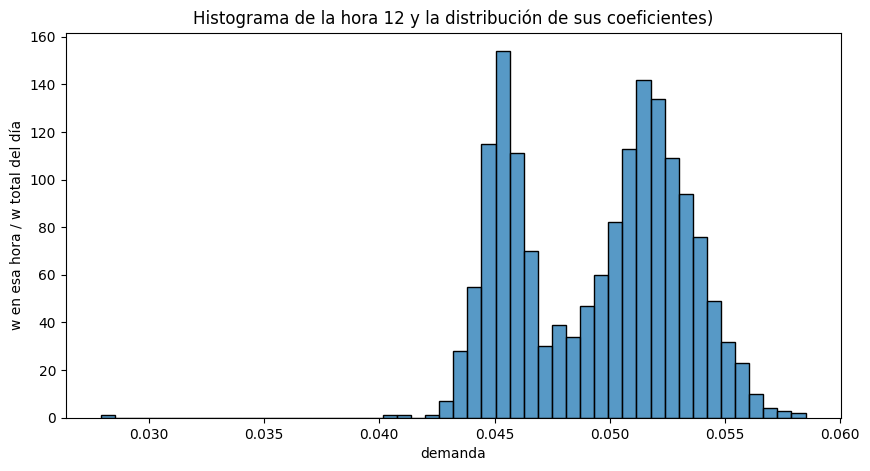

In [17]:
nbins = 50 # número de intervalos, ajustar para buena visualización

fig = plt.figure(1, figsize=(10, 5)) # permite indicar el nº de la figura y las dimensiones (ancho y alto)
sns.histplot(data= df_orig['CR20'], bins=nbins)
# sns.rugplot(x, color='r')                            # opcional
plt.title(f'Histograma de la hora 12 y la distribución de sus coeficientes)')
plt.xlabel('demanda')
plt.ylabel('w en esa hora / w total del día')
plt.show()

In [18]:
print("En la distribución de los coeficientes de la hora 20 encontramos una distribución algo más inusual, como si fueran 2 normales juntos " "\n" " Estudiaremos más adelante la razón de que esto ocurra.")

En la distribución de los coeficientes de la hora 20 encontramos una distribución algo más inusual, como si fueran 2 normales juntos 
 Estudiaremos más adelante la razón de que esto ocurra.


## Pregunta 2: ¿La distribución cambia con el día? ¿La hora? ¿El mes? ¿Si es festivo o no? 

In [19]:
# Pregunta 2: ¿La distribución cambia con el día? ¿La hora? ¿El mes? ¿Si es festivo o no? 

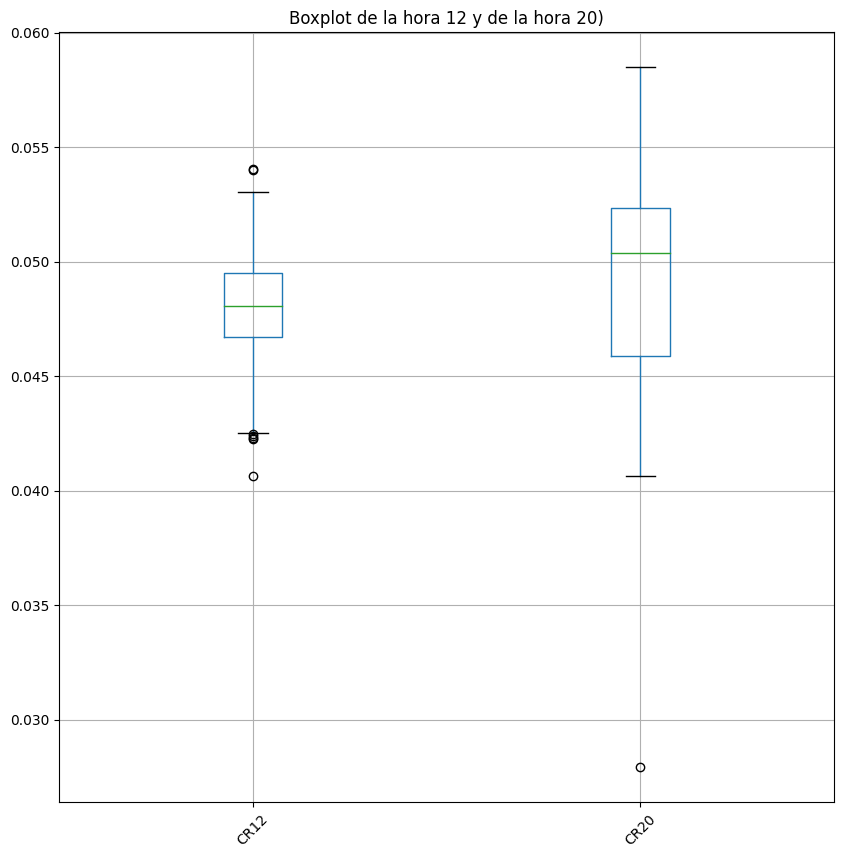

In [20]:
# crea dataframe con las variables (pueden ser más de dos)
df =  pd.DataFrame(list(zip(df_orig['CR12'], df_orig['CR20'])), columns=['CR12','CR20' ])
#print(df)

df.boxplot(figsize=(10, 10), rot=45) # con rot=0 las etiquetas del eje x no se inclinan
plt.title(f'Boxplot de la hora 12 y de la hora 20)')
plt.show()

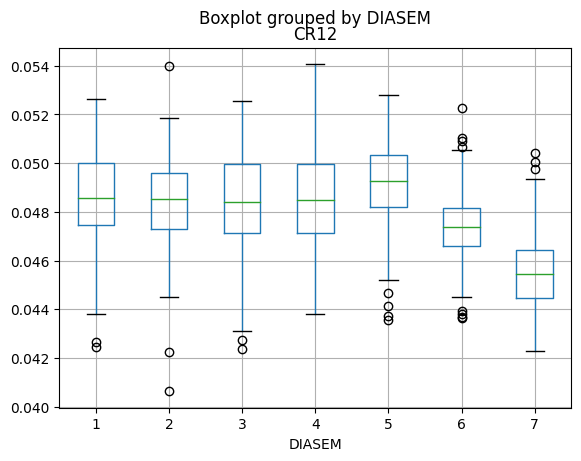

<Figure size 10000x10000 with 0 Axes>

In [21]:
# Vamos a evaluar en el siguiente gráfico de cajas, cómo varía la distribución de cada hora en función del día de la semana

df = df_orig
df.boxplot('CR12', by = 'DIASEM')
fig = plt.figure(100, figsize=(100, 100))
plt.show()

In [22]:
print("En los datos de la gráfica superior observamos que los jueves es el único día que no hay datos atípicos, " "\n" "asimismo, el vierse presenta la media más alta de demanda y el domingo la más baja," "\n" "en el resto de días semanales se mantine más o menos estable y se ve que baja draticamente en el fin de semana")

En los datos de la gráfica superior observamos que los jueves es el único día que no hay datos atípicos, 
asimismo, el vierse presenta la media más alta de demanda y el domingo la más baja,
en el resto de días semanales se mantine más o menos estable y se ve que baja draticamente en el fin de semana


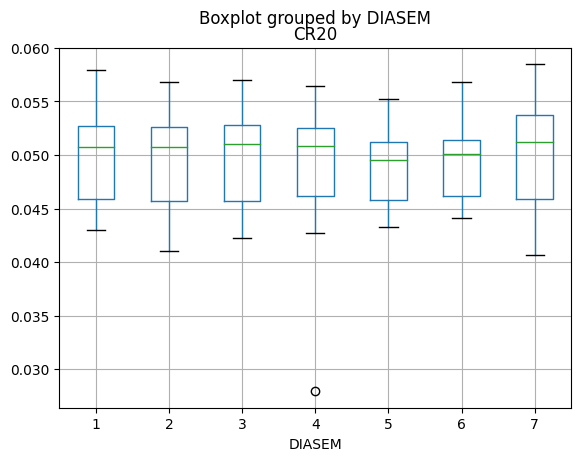

In [23]:
df = df_orig
df.boxplot('CR20', by = 'DIASEM')
fig = plt.figure(1, figsize=(100, 100))
plt.show()

In [24]:
print("Al contrario que en la hora 12 en la hora 20, se ve que la media de todos los días se mantiene algo similar" "\n" "Cabe destacar que en esta ocasión es el viernes el día que presenta la menor media y el domingo la que más.")

Al contrario que en la hora 12 en la hora 20, se ve que la media de todos los días se mantiene algo similar
Cabe destacar que en esta ocasión es el viernes el día que presenta la menor media y el domingo la que más.


In [25]:
# En los siguientes diagramos de cajas, vamos a evaluar como cambia la distribución de cada hora por mes

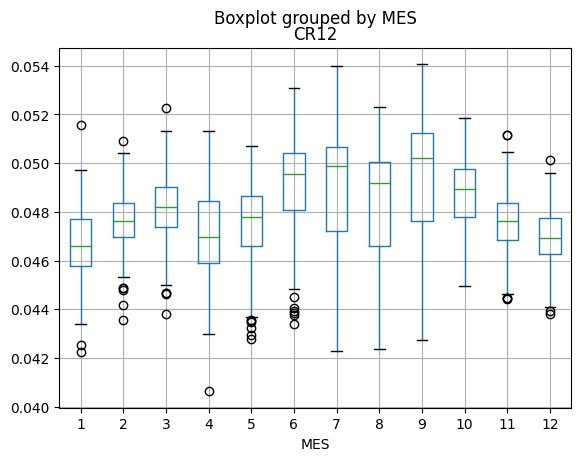

<Figure size 10000x10000 with 0 Axes>

In [26]:
df = df_orig
df.boxplot('CR12', by = 'MES')
fig = plt.figure(100, figsize=(100, 100))
plt.show()

In [27]:
print("En la hora 12, observamos que en los meses de invierno, (diciembre - enero) la demanda media es mucho más baja que en los meses de verano (junio - septiembre)")

En la hora 12, observamos que en los meses de invierno, (diciembre - enero) la demanda media es mucho más baja que en los meses de verano (junio - septiembre)


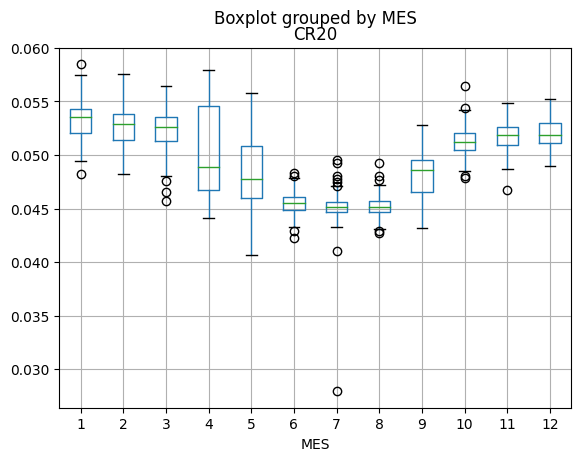

<Figure size 10000x10000 with 0 Axes>

In [28]:
df = df_orig
df.boxplot('CR20', by = 'MES')
fig = plt.figure(100, figsize=(100, 100))
plt.show()

In [29]:
print("En la hora 20, observamos que en los meses de invierno, (diciembre - enero) la demanda media es mucho más alta que en los meses de verano (junio - septiembre)")

En la hora 20, observamos que en los meses de invierno, (diciembre - enero) la demanda media es mucho más alta que en los meses de verano (junio - septiembre)


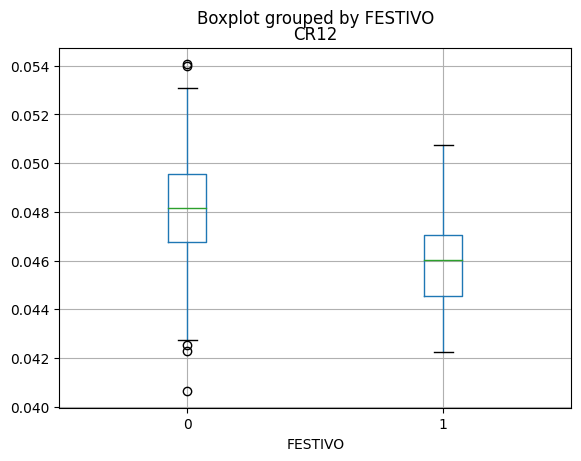

<Figure size 10000x10000 with 0 Axes>

In [30]:
df = df_orig
df.boxplot('CR12', by = 'FESTIVO')
fig = plt.figure(100, figsize=(100, 100))
plt.show()

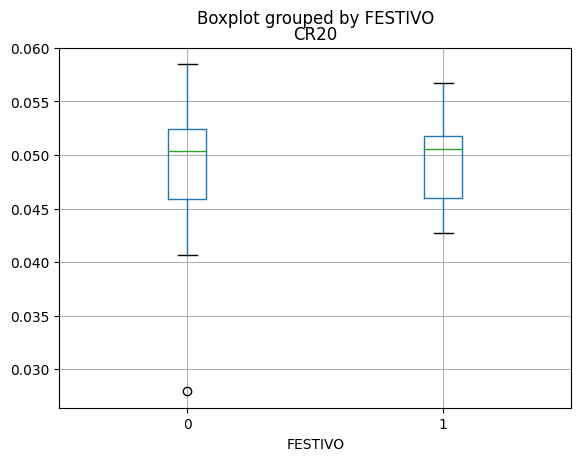

<Figure size 10000x10000 with 0 Axes>

In [31]:
df = df_orig
df.boxplot('CR20', by = 'FESTIVO')
fig = plt.figure(100, figsize=(100, 100))
plt.show()

## Pregunta 3: ¿Cuál es la relación de los coeficientes de cada hora con la temperatura máx.? ¿la min? ¿depende esto del día?

In [32]:
# Pregunta 3: ¿Cuál es la relación de los coeficientes de cada hora con la temperatura máx.? ¿la min? ¿depende esto del día?

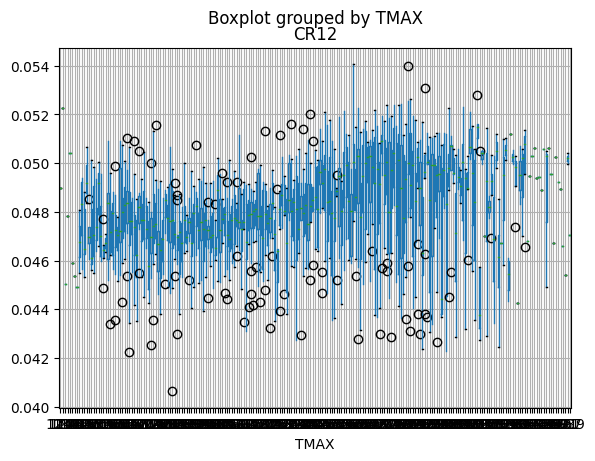

<Figure size 10000x10000 with 0 Axes>

In [33]:
df = df_orig
df.boxplot('CR12', by = 'TMAX')
fig = plt.figure(100, figsize=(100, 100))
plt.show()

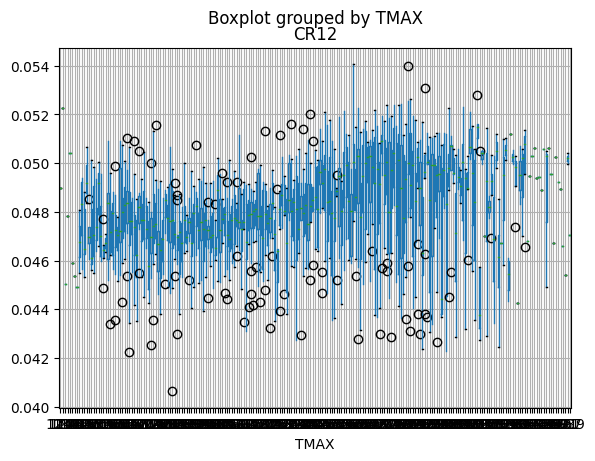

<Figure size 1e+10x1e+08 with 0 Axes>

In [34]:
df = df_orig
df.boxplot('CR12', by = 'TMAX')
fig = plt.figure(100, figsize=(100000000, 1000000))
plt.show()

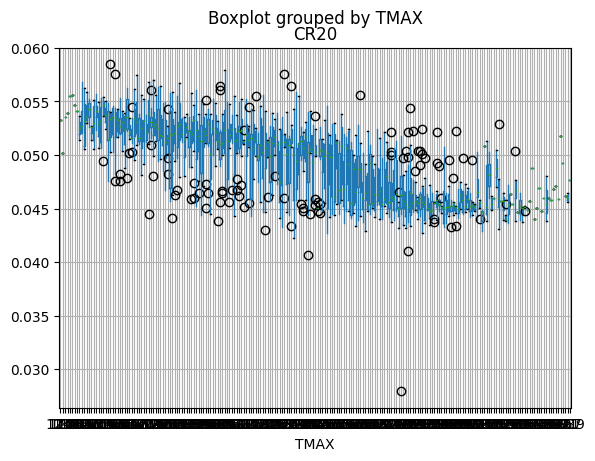

<Figure size 10000x10000 with 0 Axes>

In [35]:
df = df_orig
df.boxplot('CR20', by = 'TMAX')
fig = plt.figure(100, figsize=(100, 100))
plt.show()

Matriz correlaciones:
[[ 1.    -0.348]
 [-0.348  1.   ]]


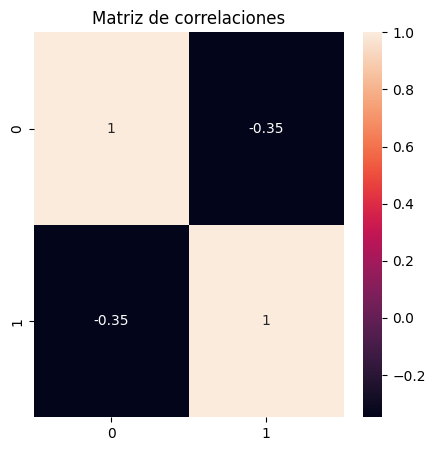

In [36]:
# matriz de correlaciones
mat_corr = np.corrcoef(df_orig['CR20'], df_orig['CR12'])                
print('Matriz correlaciones:')
print(np.round(mat_corr, 3)) # Redondeando a solo tres decimales para verlo mejor

# Muestra la matriz de correlaciones visualmente
fig = plt.figure(1,figsize=(5, 5))
sns.heatmap(mat_corr, annot=True) # si no se ven los textos con demasiadas variables, poner annot=False
plt.title('Matriz de correlaciones')
plt.show()

Matriz correlaciones:
[[ 1.    -0.707]
 [-0.707  1.   ]]


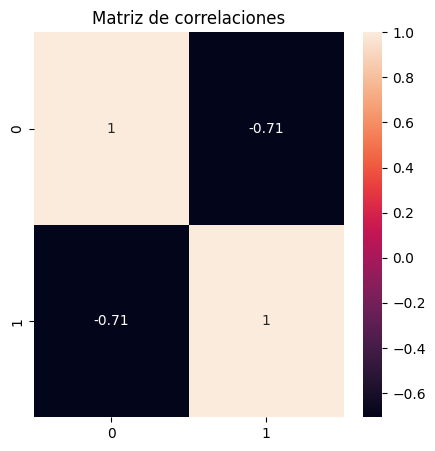

In [37]:
# matriz de correlaciones
mat_corr = np.corrcoef(df_orig['CR20'], df_orig['TMAX'])                
print('Matriz correlaciones:')
print(np.round(mat_corr, 3)) # Redondeando a solo tres decimales para verlo mejor

# Muestra la matriz de correlaciones visualmente
fig = plt.figure(1,figsize=(5, 5))
sns.heatmap(mat_corr, annot=True) # si no se ven los textos con demasiadas variables, poner annot=False
plt.title('Matriz de correlaciones')
plt.show()

Matriz correlaciones:
[[ 1.    -0.745]
 [-0.745  1.   ]]


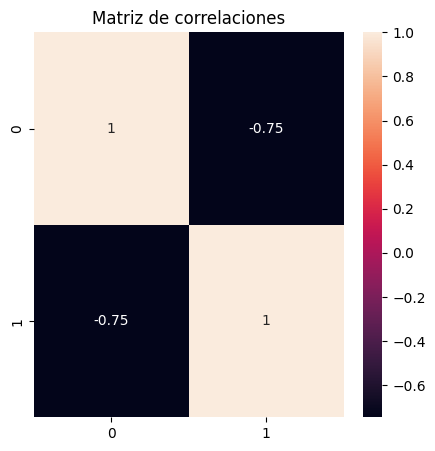

In [38]:
# matriz de correlaciones
mat_corr = np.corrcoef(df_orig['CR20'], df_orig['TMIN'])                
print('Matriz correlaciones:')
print(np.round(mat_corr, 3)) # Redondeando a solo tres decimales para verlo mejor

# Muestra la matriz de correlaciones visualmente
fig = plt.figure(1,figsize=(5, 5))
sns.heatmap(mat_corr, annot=True) # si no se ven los textos con demasiadas variables, poner annot=False
plt.title('Matriz de correlaciones')
plt.show()

Matriz correlaciones:
[[1.    0.291]
 [0.291 1.   ]]


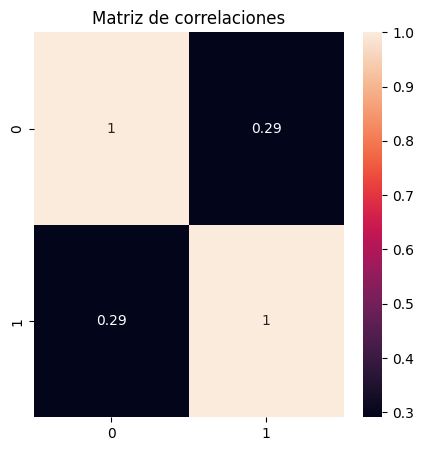

In [39]:
# matriz de correlaciones
mat_corr = np.corrcoef(df_orig['CR12'], df_orig['TMAX'])                
print('Matriz correlaciones:')
print(np.round(mat_corr, 3)) # Redondeando a solo tres decimales para verlo mejor

# Muestra la matriz de correlaciones visualmente
fig = plt.figure(1,figsize=(5, 5))
sns.heatmap(mat_corr, annot=True) # si no se ven los textos con demasiadas variables, poner annot=False
plt.title('Matriz de correlaciones')
plt.show()

Matriz correlaciones:
[[1.    0.329]
 [0.329 1.   ]]


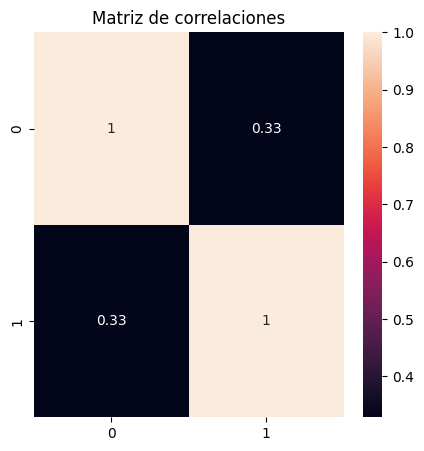

In [40]:
# matriz de correlaciones
mat_corr = np.corrcoef(df_orig['CR12'], df_orig['TMIN'])                
print('Matriz correlaciones:')
print(np.round(mat_corr, 3)) # Redondeando a solo tres decimales para verlo mejor

# Muestra la matriz de correlaciones visualmente
fig = plt.figure(1,figsize=(5, 5))
sns.heatmap(mat_corr, annot=True) # si no se ven los textos con demasiadas variables, poner annot=False
plt.title('Matriz de correlaciones')
plt.show()

In [41]:
# import tidyverse 
# library(tidyverse)

# dist_t(df.f = 3430, p = 1) + geom_vline(xintercept = 1.15)
# df <- 3430.8
# t_max <- stats::qt(p = 0.00001, df = df, lower.tail = F)
# t_alfa <- pt(q = 1.1584, df = df, lower.tail = F) *2
# t_observado <- 1.1584

# para_t <- tibble( x = seq(-t_max, t_max, length.out = 1000 * t_max),
#                  y = dt(x. df = df),
#                  alfa = ifelse(x <= t_alfa | x <= - t_alfa, "Es posible rechazar H0",
#                                "No es posible rechazar H0"))

# ggplot(para_t, aes(x = x, y = y)) + 
#     geom_ribbon(aes(ymax = y, ymin = 0, fill = alfa)) +
#     geom_vline(xintercept = t_obsevado) +
#     geom_text(x = t_obsevado - 0.1,
#               y = 0.2,
#               lavel = T obsevado = 1.15,
#               angle = 90) +
#     them(legend.postiion = "bottom")


# PARTE 2

Pregunta 1: ¿Cómo se relacionan los coeficientes de reparto de la hora 12 y de la hora 20?


Matriz correlaciones:
[[ 1.    -0.348]
 [-0.348  1.   ]]


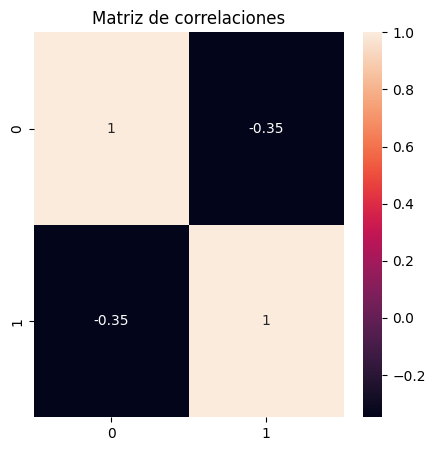

In [42]:
# matriz de correlaciones
mat_corr = np.corrcoef(df_orig['CR20'], df_orig['CR12'])                
print('Matriz correlaciones:')
print(np.round(mat_corr, 3)) # Redondeando a solo tres decimales para verlo mejor

# Muestra la matriz de correlaciones visualmente
fig = plt.figure(1,figsize=(5, 5))
sns.heatmap(mat_corr, annot=True) # si no se ven los textos con demasiadas variables, poner annot=False
plt.title('Matriz de correlaciones')
plt.show()

Como se puede observar en la matriz de correlaciones, se nos indica que existe una correlación negativa de 0.35 aprox. entre los coeficiente de la hora 12 y la hora 20.
En cualquier caso, este número no es siempre suficiente para determinar la correlación que existe entre particulares horas, por ello dibujaremos las siguientes nubes de puntos,
donde se nos mostrará una represantación mucho más visual tanto de la correlación como de los posibles atípicos que puede haber.

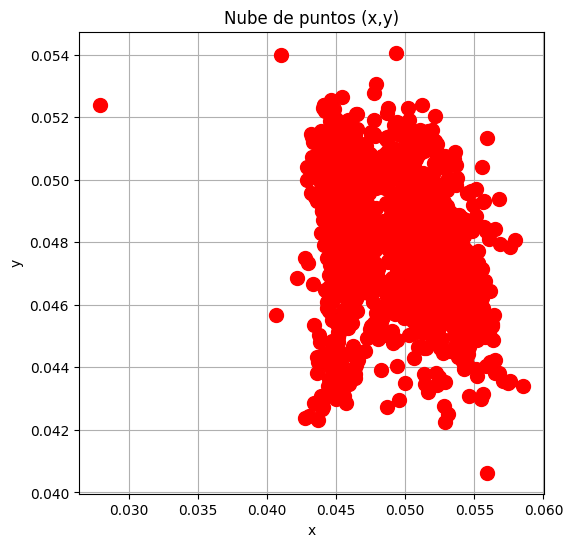

<Figure size 640x480 with 0 Axes>

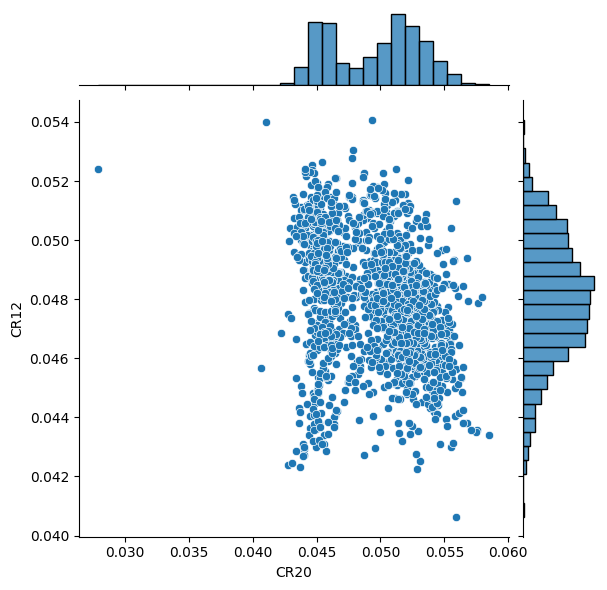

<Figure size 640x480 with 0 Axes>

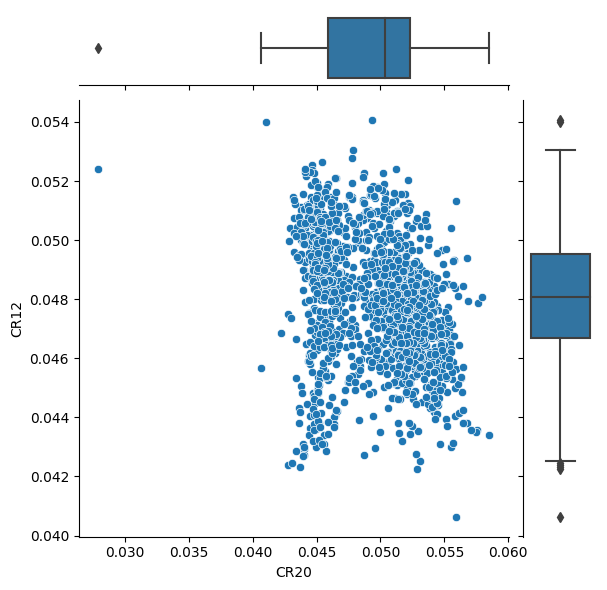

In [43]:
# scatterplot usando plt
fig = plt.figure(1, figsize=(6, 6))
plt.plot(df_orig['CR20'], df_orig['CR12'], '.', color='r', markersize = 20)
plt.title('Nube de puntos (x,y)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

# completando el scatter con los histogramas marginales
fig = plt.figure(2)
sns.jointplot(x= df_orig['CR20'], y=df_orig['CR12'])
plt.show()

# completando el scatter con los boxplots marginales
fig = plt.figure(3)
g = sns.JointGrid(x= df_orig['CR20'], y=df_orig['CR12'])
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.boxplot)
plt.show()

Observando ahora las gráficas superiores, especialmente la última donde vemos tanto la de puntos como los diagramas de cajas que nos muestran que mientras que en la hora 20 hay un único atípico, en la 12 encontramos muchos más, a continuación vamos a intentar estudiar el por qué de estos atípicos.

Pregunta 2: ¿Cómo se relacionan entre sí los 24 coeficientes de reparto? ¿Cuáles son las 4
horas más correlacionadas? ¿Se observan correlaciones no lineales entre horas?

In [47]:
coef_df = df.filter(regex="CR")

# Calcular la matriz de correlación
corr = coef_df.corr()
# Mostrar la matriz de correlación
print(corr)
print("Es complejo estimar la correlación entre datos aunque se puede observar que cuanto más próximas son las horas, ás correlados están los coeficientes de reparto")

          CR00      CR01      CR02      CR03      CR04      CR05      CR06  \
CR00  1.000000  0.971120  0.771961  0.890907  0.854346  0.793964  0.540510   
CR01  0.971120  1.000000  0.819146  0.951734  0.917786  0.856431  0.597592   
CR02  0.771961  0.819146  1.000000  0.824273  0.807469  0.765445  0.563357   
CR03  0.890907  0.951734  0.824273  1.000000  0.983387  0.934589  0.723830   
CR04  0.854346  0.917786  0.807469  0.983387  1.000000  0.971530  0.778243   
CR05  0.793964  0.856431  0.765445  0.934589  0.971530  1.000000  0.852828   
CR06  0.540510  0.597592  0.563357  0.723830  0.778243  0.852828  1.000000   
CR07 -0.570594 -0.572839 -0.458254 -0.470263 -0.419634 -0.328726  0.126485   
CR08 -0.752943 -0.751012 -0.609879 -0.662972 -0.610572 -0.532713 -0.189630   
CR09 -0.786032 -0.788163 -0.649166 -0.723953 -0.684645 -0.629563 -0.373020   
CR10 -0.725030 -0.728095 -0.616803 -0.696424 -0.681379 -0.664479 -0.526271   
CR11 -0.596551 -0.587045 -0.512645 -0.582166 -0.590067 -0.610297

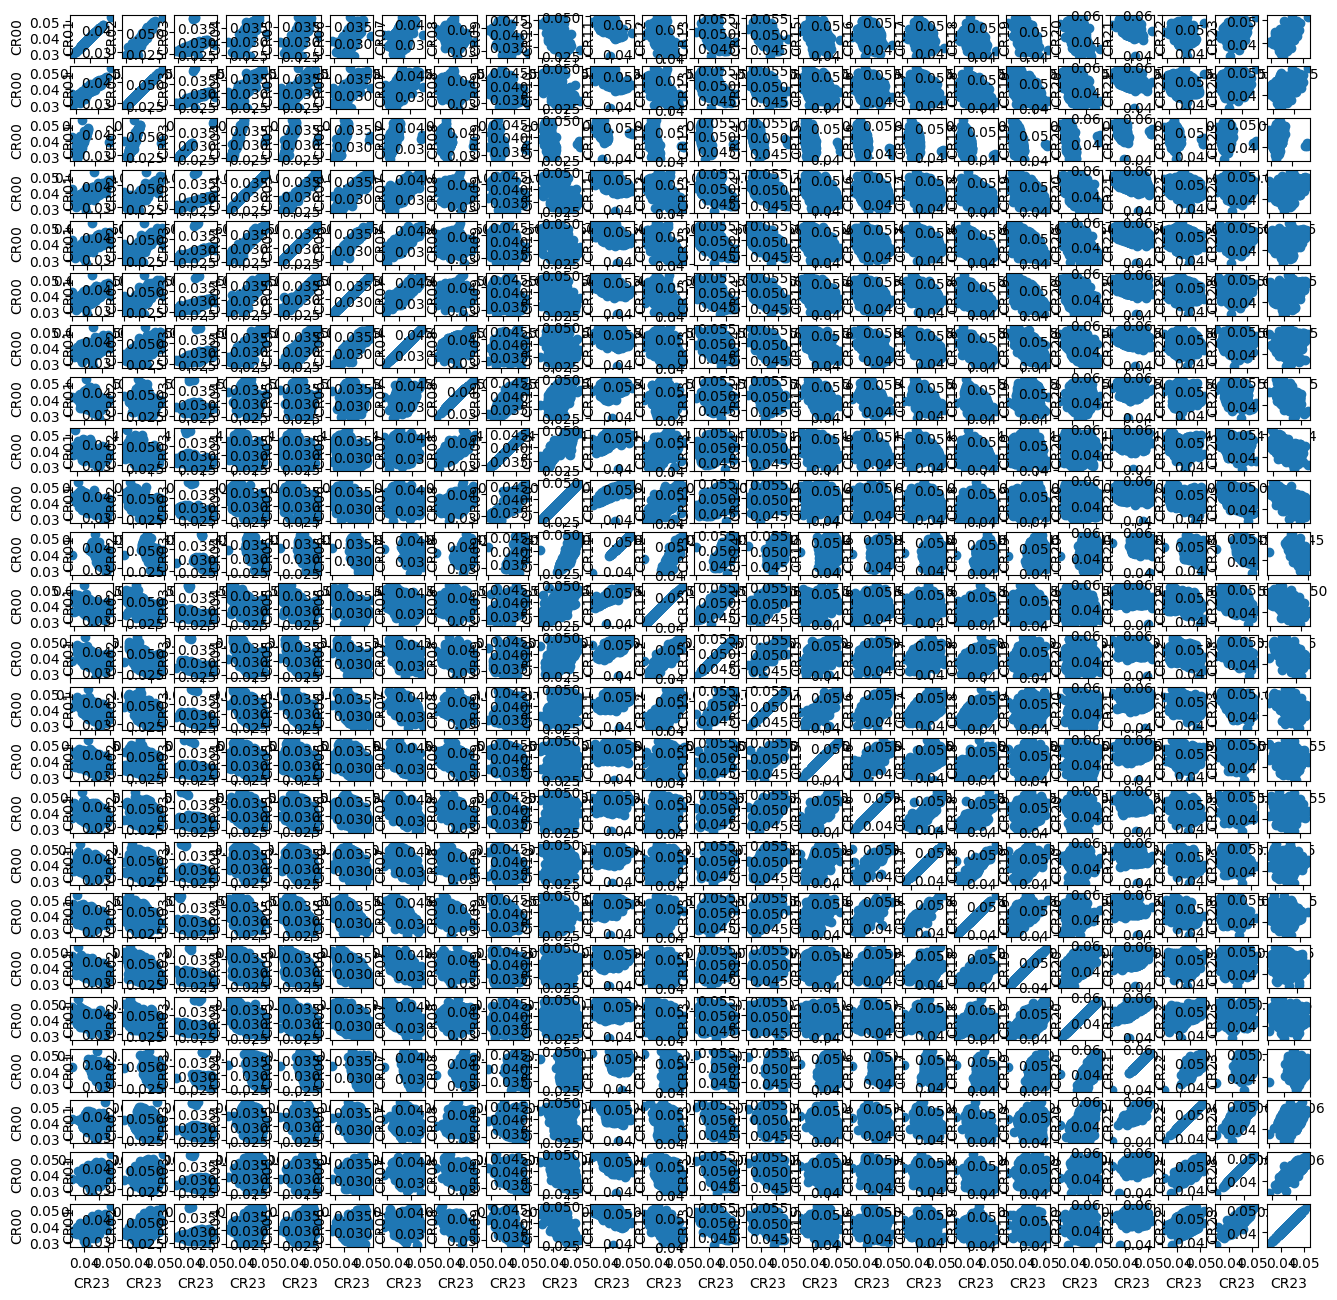

Aquí nuevamente se puede observar la dispersión de cada variable, y se confirma que cuanto más cercanas las horas mayor correlación, para observar mejor vamos a representar los 4 más correlados y los 4 más incorrelados


In [50]:
coef_df = df.filter(regex="CR")

# Obtener una lista con las columnas
columns = coef_df.columns

# Crear una figura con 24 subplots
fig, axs = plt.subplots(24, 24, figsize=(16, 16))

# Iterar sobre todas las combinaciones de horas
for i in range(24):
    for j in range(24):
        x = coef_df[columns[i]]
        y = coef_df[columns[j]]
        axs[i, j].scatter(x, y)
        axs[i, j].set_xlabel(columns[i])
        axs[i, j].set_ylabel(columns[j])

# Mostrar la figura
plt.show()
print("Aquí nuevamente se puede observar la dispersión de cada variable, y se confirma que cuanto más cercanas las horas mayor correlación, para observar mejor vamos a representar los 4 más correlados y los 4 más incorrelados")


In [52]:
top_corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool)).unstack().sort_values(ascending=False)
bottom_corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool)).unstack().sort_values(ascending=True)

print("Top 4 Correlation:")
print(top_corr.head(4))

print("Bottom 4 Correlation:")
print(bottom_corr.head(4))
print("La hipótesis se demuestra con imprimiendo las 4 más correladas y las 4 más incorreladas, mayor pasan 8h, menor 1h")

Top 4 Correlation:
CR04  CR03    0.983387
CR05  CR04    0.971530
CR01  CR00    0.971120
CR03  CR01    0.951734
dtype: float64
Bottom 4 Correlation:
CR09  CR01   -0.788163
      CR00   -0.786032
CR08  CR00   -0.752943
      CR01   -0.751012
dtype: float64
La hipótesis se demuestra con imprimiendo las 4 más correladas y las 4 más incorreladas, mayor pasan 8h, menor 1h


C:\Users\pablo\AppData\Local\Temp\ipykernel_13284\2834704614.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  top_corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool)).unstack().sort_values(ascending=False)
C:\Users\pablo\AppData\Local\Temp\ipykernel_13284\2834704614.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bottom_corr 

CR01  CR01    1.000000
CR03  CR04    0.983387
CR05  CR04    0.971530
CR01  CR03    0.951734
CR03  CR05    0.934589
dtype: float64


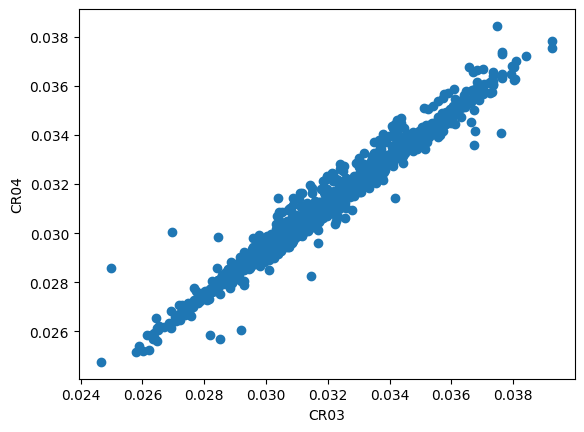

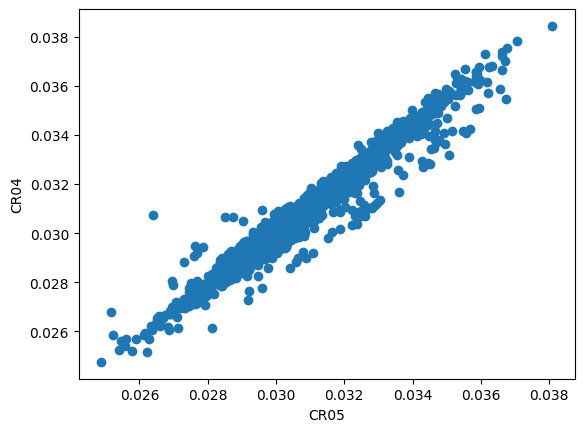

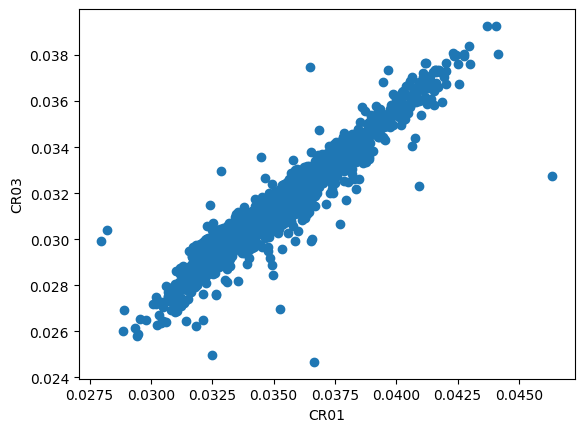

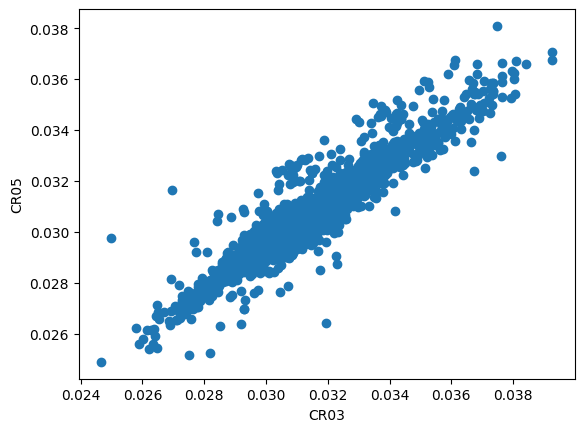

In [70]:
# Encontrar las 4 horas más correlacionadas
most_correlated = corr.unstack().sort_values(ascending=False).drop_duplicates()[:5]
print(most_correlated)

# Crear un gráfico de dispersión para visualizar cada una de las 5 relaciones más fuertes
for i in range(5):
    if most_correlated.index[i][0] != most_correlated.index[i][1]:
        plt.scatter(df[most_correlated.index[i][0]], df[most_correlated.index[i][1]])
        plt.xlabel(most_correlated.index[i][0])
        plt.ylabel(most_correlated.index[i][1])
        plt.show()

Las 4 coeficientes más correlados son:
CR03 y CR04 con una correlación de 0.9833873983760018
CR04 y CR05 con una correlación de 0.9715301362978496
CR01 y CR03 con una correlación de 0.9517339213561314
CR03 y CR05 con una correlación de 0.9345889923361504


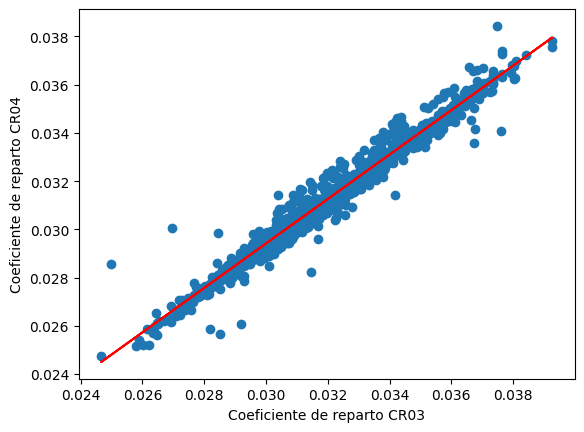

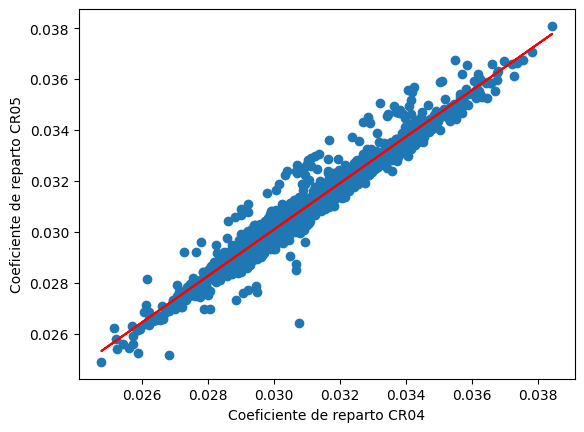

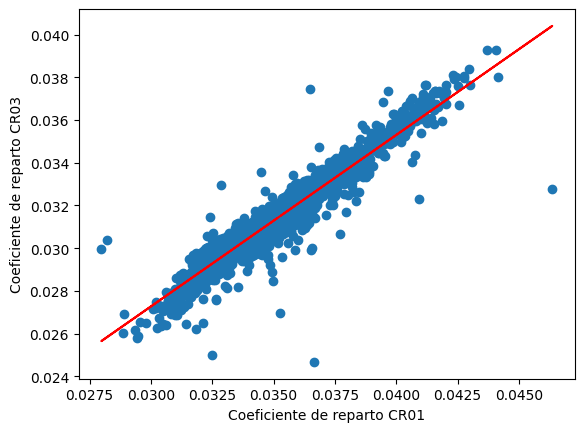

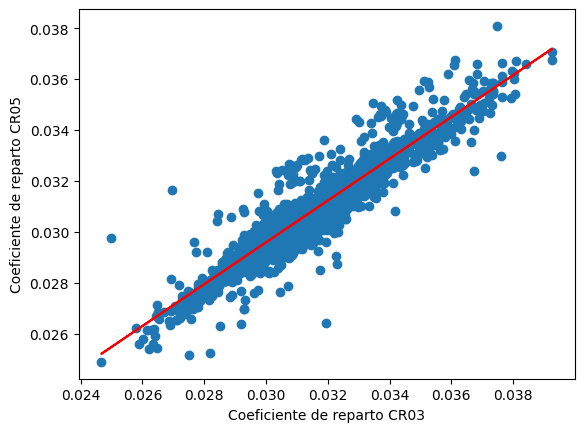

In [74]:
corr = df.iloc[:, 1:24].corr()
corr_matrix = np.abs(corr)
high_corr_var=np.where(corr_matrix>0.8)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y], corr_matrix.iloc[x, y]) 
               for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var.sort(key=lambda x: x[2], reverse=True)
high_corr_var = high_corr_var[:4]

print("Las 4 coeficientes más correlados son:")
for pair in high_corr_var:
    print("{} y {} con una correlación de {}".format(pair[0], pair[1], pair[2]))

for pair in high_corr_var:
    x = df[pair[0]]
    y = df[pair[1]]
    
    # Crear un modelo de regresión lineal
    model = LinearRegression()
    model.fit(x.values.reshape(-1,1), y.values.reshape(-1,1))

    # Predecir la respuesta para los datos de entrada
    y_pred = model.predict(x.values.reshape(-1,1))

    # Visualizar los datos y la línea de regresión
    plt.scatter(x, y)
    plt.plot(x, y_pred, color='red')
    plt.xlabel("Coeficiente de reparto " + pair[0])
    plt.ylabel("Coeficiente de reparto " + pair[1])
    plt.show()
    
    print("Se muestra la regresión lineal entre las más correladas, verifica teoría, estaría bien plotear para las menos correladas")

In [82]:
# Cálculo de la matriz de correlación
corr = df.iloc[:, 1:24].corr()

# Inicialización de la lista para almacenar las parejas de variables con correlación no lineal
correlaciones_no_lineales = []

# Recorremos cada columna de la matriz de correlación
for col1 in corr.columns:
    for col2 in corr.columns:
        if col1 == col2:
            continue
        # Verificamos si hay una correlación no lineal
        if abs(corr.loc[col1, col2]) < 0.6:
            # Almacenamos la pareja de variables con correlación no lineal en la lista
            correlaciones_no_lineales.append((col1, col2))

# Eliminamos las parejas redundates
correlaciones_no_lineales = list(set(correlaciones_no_lineales))

# Imprimimos la lista de parejas de variables con correlación no lineal
print("Se han identificado las siguientes correlaciones no lineales:")
print(correlaciones_no_lineales)

Se han identificado las siguientes correlaciones no lineales:
[('CR04', 'CR17'), ('CR20', 'CR13'), ('CR21', 'CR01'), ('CR22', 'CR08'), ('CR11', 'CR19'), ('CR07', 'CR11'), ('CR06', 'CR18'), ('CR04', 'CR18'), ('CR22', 'CR02'), ('CR21', 'CR10'), ('CR19', 'CR03'), ('CR19', 'CR22'), ('CR21', 'CR15'), ('CR07', 'CR06'), ('CR13', 'CR19'), ('CR18', 'CR16'), ('CR05', 'CR17'), ('CR16', 'CR19'), ('CR11', 'CR14'), ('CR08', 'CR19'), ('CR04', 'CR20'), ('CR18', 'CR14'), ('CR22', 'CR13'), ('CR12', 'CR17'), ('CR03', 'CR22'), ('CR07', 'CR01'), ('CR15', 'CR21'), ('CR05', 'CR18'), ('CR20', 'CR23'), ('CR17', 'CR18'), ('CR09', 'CR06'), ('CR12', 'CR18'), ('CR14', 'CR04'), ('CR15', 'CR02'), ('CR19', 'CR05'), ('CR07', 'CR15'), ('CR14', 'CR22'), ('CR17', 'CR12'), ('CR05', 'CR20'), ('CR18', 'CR13'), ('CR04', 'CR19'), ('CR12', 'CR20'), ('CR15', 'CR13'), ('CR21', 'CR09'), ('CR09', 'CR15'), ('CR02', 'CR11'), ('CR17', 'CR10'), ('CR03', 'CR17'), ('CR19', 'CR06'), ('CR19', 'CR12'), ('CR02', 'CR06'), ('CR02', 'CR12'), (